In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import os, sys

In [2]:
os.makedirs('../data', exist_ok=True)
os.makedirs('../data/proc', exist_ok=True)

# Download datasets

## PBMC 3k

In [3]:
os.makedirs('../data/pbmc3k/', exist_ok=True)
!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O ../data/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
!cd ../data/pbmc3k/; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz; rm pbmc3k_filtered_gene_bc_matrices.tar.gz


--2020-09-07 09:30:28--  http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz [following]
--2020-09-07 09:30:28--  https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7621991 (7,3M) [application/x-tar]
Saving to: ‘../data/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz’

../data/pbmc3k/pbmc 100%[===================>]   7,27M  26,2MB/s    in 0,3s    

2020-09-07 09:30:28 (26,2 MB/s) - ‘../data/pbmc3k/pbmc3k_filtered_gene_bc_matrices.ta

In [3]:
data_path = '../data/pbmc3k/filtered_gene_bc_matrices/hg19'
results_file = '../data/proc/pbmc3k.h5ad'
results_file2 = '../data/proc/pbmc3k.tfrecord'

In [4]:
gene_up = 2500
percent_mito_up = 0.05
n_pcs = 40
resolution = 1.0

In [5]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [6]:
#Louvain    Markers       Cell Type
#0          IL7R, CD4     T cells
#1          CD14, LYZ     CD14+ Monocytes
#2          MS4A1         B cells
#3          CD8A, CD8     T cells
#4          GNLY, NKG7    NK cells
#5          FCGR3A, MS4A7 FCGR3A+ Monocytes
#6          FCER1A, CST3  Dendritic Cells
#7          PPBP          Megakaryocytes

In [7]:
new_cluster_names = [
    'CD4 T', 'CD14+ Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A+ Monocytes',
    'Dendritic', 'Megakaryocytes']

## PBMC 8k

In [ ]:
os.makedirs('../data/pbmc8k/', exist_ok=True)
!wget http://cf.10xgenomics.com/samples/cell-exp/2.1.0/pbmc8k/pbmc8k_filtered_gene_bc_matrices.tar.gz -O ../data/pbmc8k/pbmc8k_filtered_gene_bc_matrices.tar.gz
!cd ../data/pbmc8k/; tar -xzf pbmc8k_filtered_gene_bc_matrices.tar.gz; rm pbmc8k_filtered_gene_bc_matrices.tar.gz


In [ ]:
data_path = '../data/pbmc8k/filtered_gene_bc_matrices/GRCh38/'
results_file = '../data/proc/pbmc8k.h5ad'
results_file2 = '../data/proc/pbmc8k.tfrecord'

In [ ]:
gene_up = 2500
percent_mito_up = 0.05
n_pcs = 20
resolution = 0.7

In [ ]:
marker_genes = ['IL7R','CD4' ,'CD8A', 'CD8B', 
                'LYZ', 'CD14',
                'MS4A1', 
                'CD79A',
                'LGALS3', 'S100A8', 
                'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 
                'FCER1A', 'CST3', 
               ]

In [ ]:
new_cluster_names = [
    'CD4+_T-Cells',
    'CD14+_Monocytes',
        'CD8+_T-Cells',
        'CD4+_T-Cells ',
    'B_cells',
    'NK',
    'B_cells ',
    'CD4+_T-Cells  ',
    'NK ',
    'NK  ',
    'FCGR3A+_Monocytes',
    'Dendritic_cells',
    'Megakaryocytes']

## PBMC 10k

In [ ]:
os.makedirs('../data/pbmc10k/', exist_ok=True)
!wget http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_v3/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz  -O ../data/pbmc10k/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz
!cd ../data/pbmc10k/; tar -xzf pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz; rm pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz


--2019-09-24 09:41:36--  http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_v3/pbmc_10k_v3_filtered_feature_bc_matrix.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 143.204.247.100, 143.204.247.31, 143.204.247.106, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|143.204.247.100|:80... 

In [3]:
os.makedirs('../data/proc', exist_ok=True)
data_path = '../data/pbmc10k/filtered_feature_bc_matrix'
results_file = '../data/proc/pbmc10k.h5ad'
results_file2 = '../data/proc/pbmc10k.tfrecord'

In [4]:
gene_up = 4500
percent_mito_up = 0.3
n_pcs = 40
resolution = 0.6

In [5]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'TRAC', 'CD8A', 'CD8B','CD4', 'LYZ', 'CD14',
                'LGALS3', 'S100A8','CD14', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7','IL6R', 'FCER1A', 'CST3', 'PPBP', 'IL3RA', 'CD40']

In [6]:
new_cluster_names = [
    'CD14+ Monocytes', 
    'Double negative T cells',
    'CD14+ Monocytes__', 
    'Double negative T cells__',
    'Mature B cell',
    'CD8 Effector', 
    'NK cells','Plasma cell','CD8 Effector__','FCGR3A+ Monocytes','CD8 Naive','Megakaryocytes','Immature B cell','CD14+ Monocytes______','Dendritic cells',
    'CD8 Effector____','pDC','Dendritic cells__']

## CLUSTER1-8k-SPLATTER

In [3]:
data_path = '/work/SPLATTER-DATA-8k/CLUSTER1-8k-SPLATTER'
results_file = '../data/proc/cluster1-8k-splatter.h5ad'
results_file2 = '../data/proc/cluster1-8k-splatter.tfrecord'

In [4]:
gene_up = 14000
n_pcs = 50
resolution = 0.6

## CLUSTER3-8k-SPLATTER

In [3]:
data_path = '/work/SPLATTER-DATA-8k/CLUSTER3-8k-SPLATTER'
results_file = '../data/proc/cluster3-8k-splatter.h5ad'
results_file2 = '../data/proc/cluster3-8k-splatter.tfrecord'

In [4]:
gene_up = 14000
n_pcs = 50
resolution = 0.6

## CLUSTER5-8k-SPLATTER

In [5]:
data_path = '/work/SPLATTER-DATA-8k/CLUSTER5-8k-SPLATTER'
results_file = '../data/proc/cluster5-8k-splatter.h5ad'
results_file2 = '../data/proc/cluste5-8k-splatter.tfrecord'

In [6]:
gene_up = 14000
n_pcs = 50
resolution = 0.6

## CLUSTER12-8k-SPLATTER

In [3]:
data_path = '/work/SPLATTER-DATA-8k/CLUSTER12-8k-SPLATTER'
results_file = '../data/proc/cluster12-8k-splatter.h5ad'
results_file2 = '../data/proc/cluste12-8k-splatter.tfrecord'

In [4]:
gene_up = 14000
n_pcs = 50
resolution = 0.6

# Data preprocessing

In [8]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,facecolor='white')

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.7.1 leidenalg==0.7.0


In [9]:
adata = sc.read_10x_mtx(
            data_path,  # the directory with the `.mtx` file
            var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
            cache=True)                                # write a cache file for faster subsequent reading

... reading from cache file cache/..-data-pbmc3k-filtered_gene_bc_matrices-hg19-matrix.h5ad


In [10]:
adata.var_names_make_unique()  # this is unnecessary if using 'gene_ids'

In [11]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

normalizing counts per cell
    finished (0:00:00)


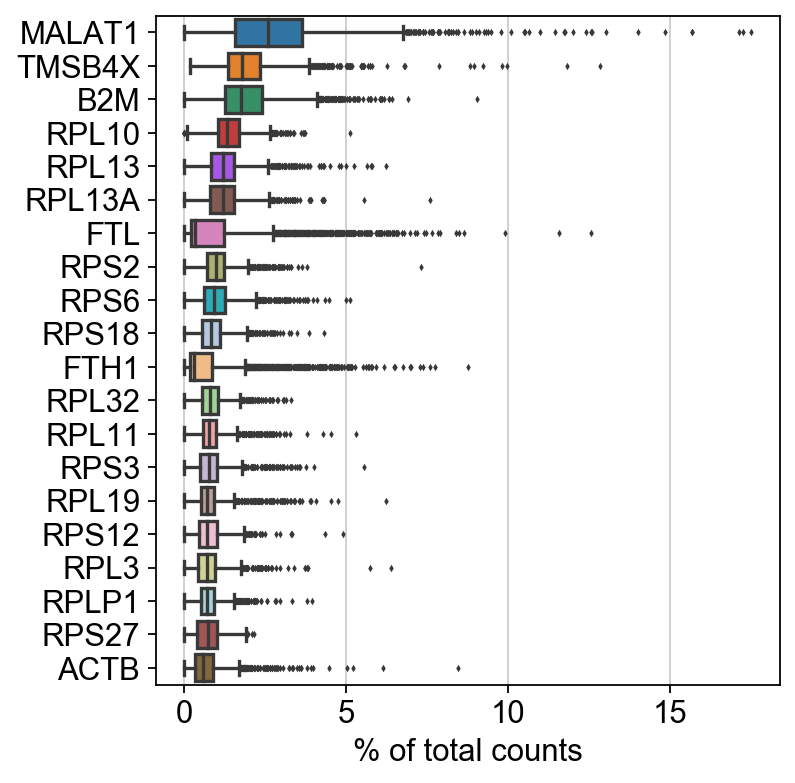

In [12]:
# Show those genes that yield the highest fraction of counts in each single cells, across all cells.
sc.pl.highest_expr_genes(adata, n_top=20)

In [13]:
# Basic filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


In [14]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

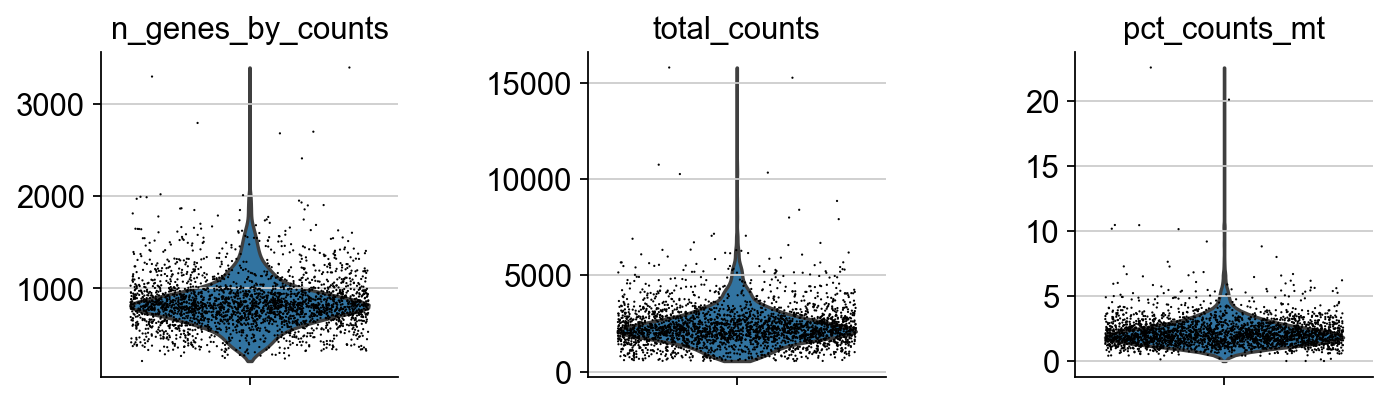

In [15]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

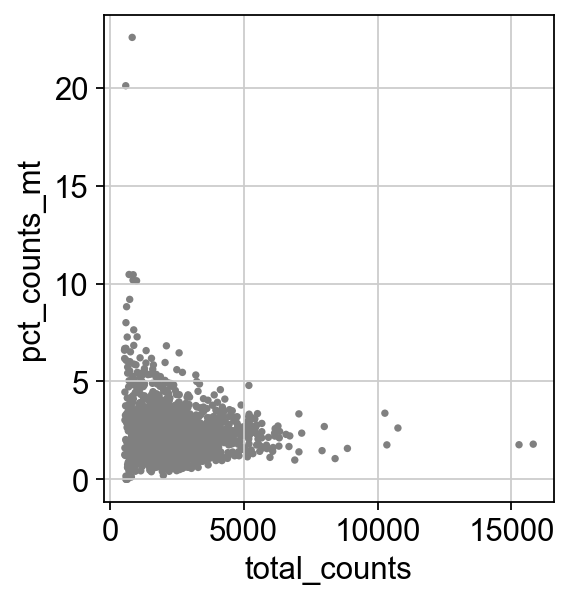

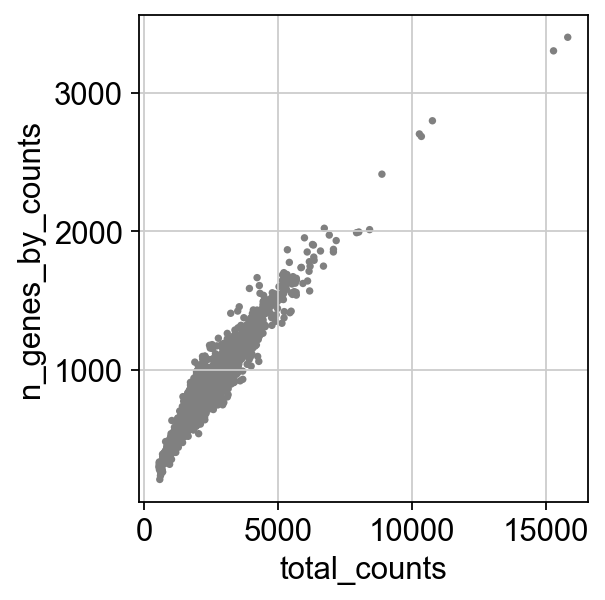

In [16]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [17]:
adata = adata[adata.obs.n_genes_by_counts < 2500,:]
adata = adata[adata.obs.pct_counts_mt < 5,:]

In [18]:
#total count normalize to 10000 reads per cell
sc.pp.normalize_total(adata,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/Users/palessandro/opt/anaconda3/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [19]:
#logarithmize the data
sc.pp.log1p(adata)

In [20]:
#identify highly-variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


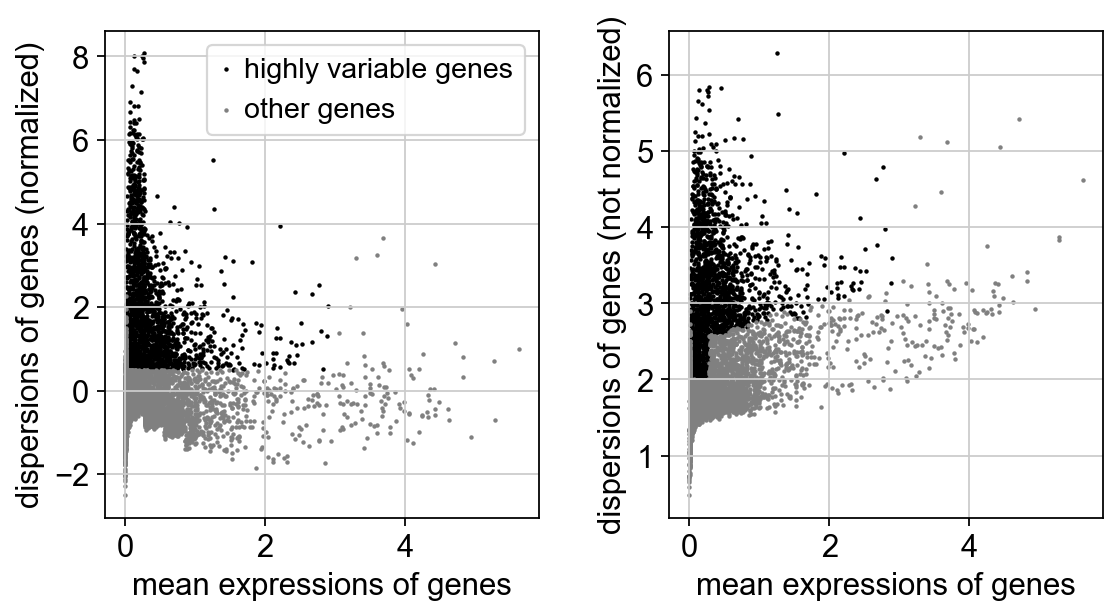

In [21]:
sc.pl.highly_variable_genes(adata)

In [22]:
#raw contains normalized and logarithmized raw gene expression data
adata.raw=adata

In [23]:
adata = adata[:, adata.var.highly_variable]

In [24]:
sc.pp.regress_out(adata,['total_counts','pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:07)


In [25]:
sc.pp.scale(adata, max_value=10)

In [26]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


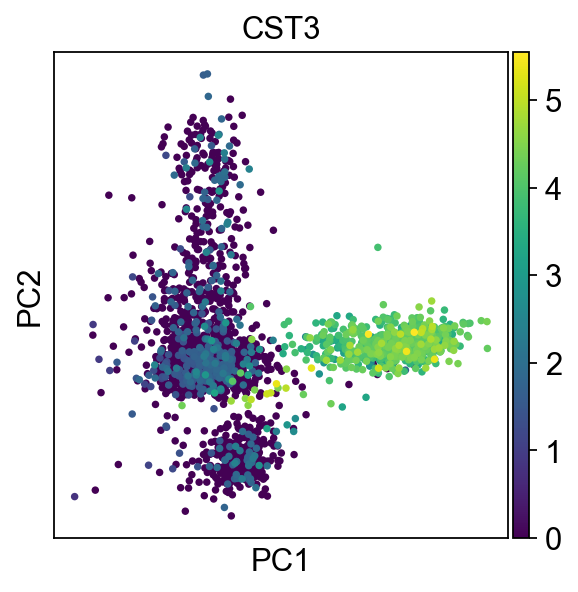

In [27]:
sc.pl.pca(adata, color='CST3')

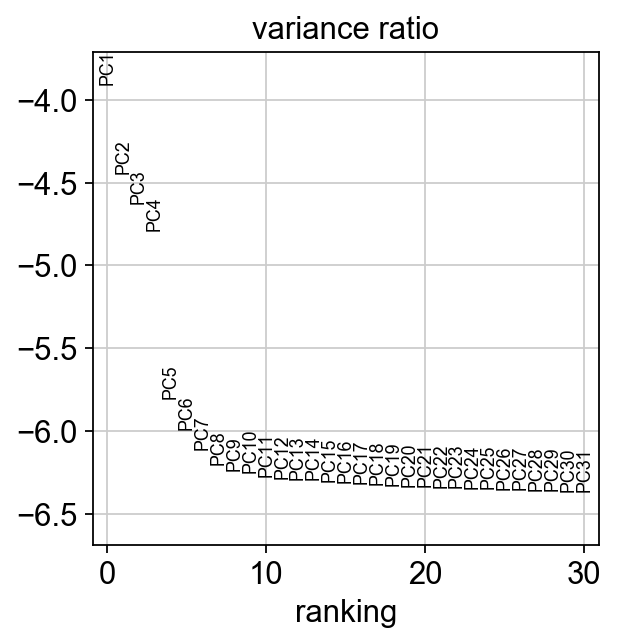

In [28]:
sc.pl.pca_variance_ratio(adata, log=True)

In [29]:
adata.write(results_file)

In [30]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [31]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=n_pcs)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [32]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


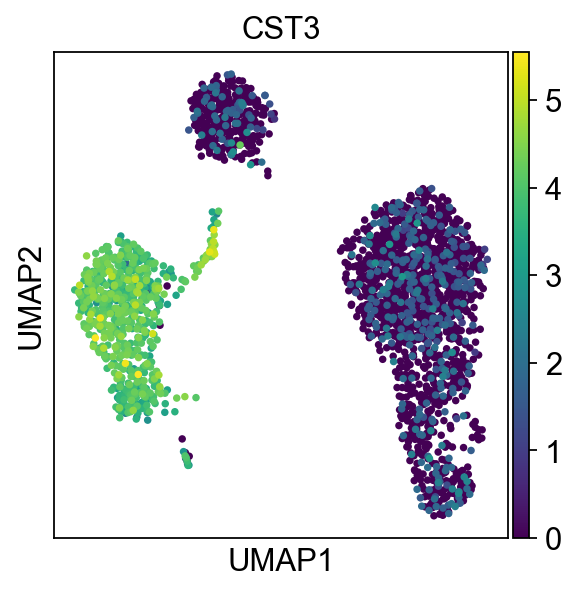

In [33]:
sc.pl.umap(adata, color=['CST3'])

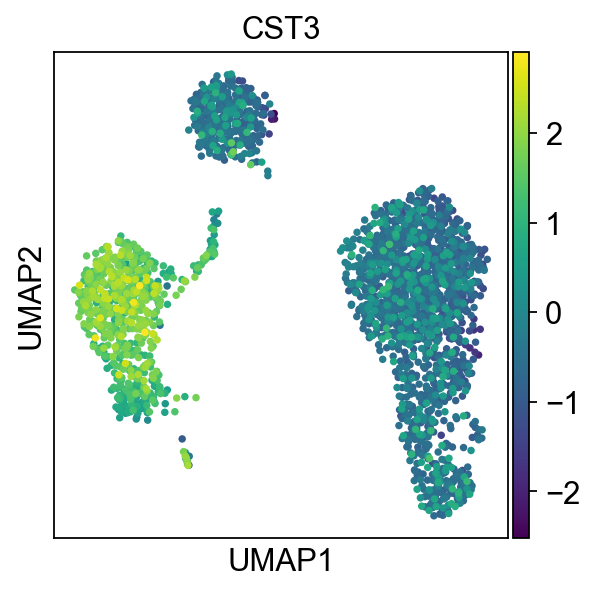

In [34]:
sc.pl.umap(adata, color=['CST3'],use_raw=False)

In [35]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


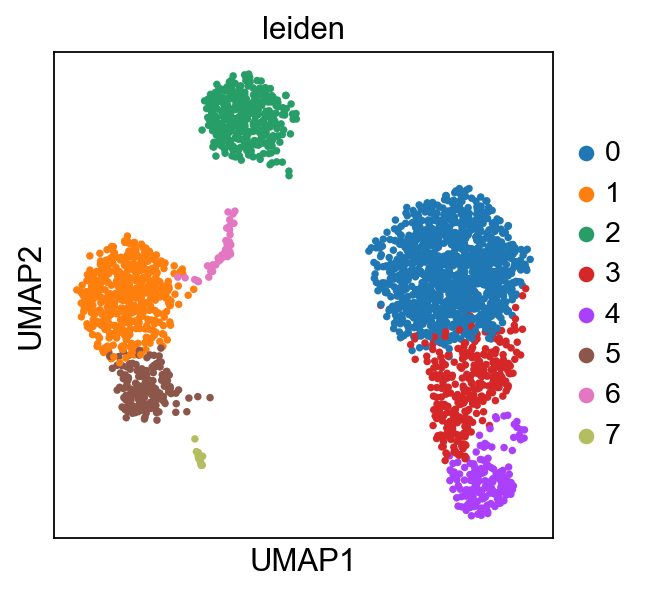

In [36]:
sc.pl.umap(adata, color=['leiden'])

In [37]:
adata.write(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


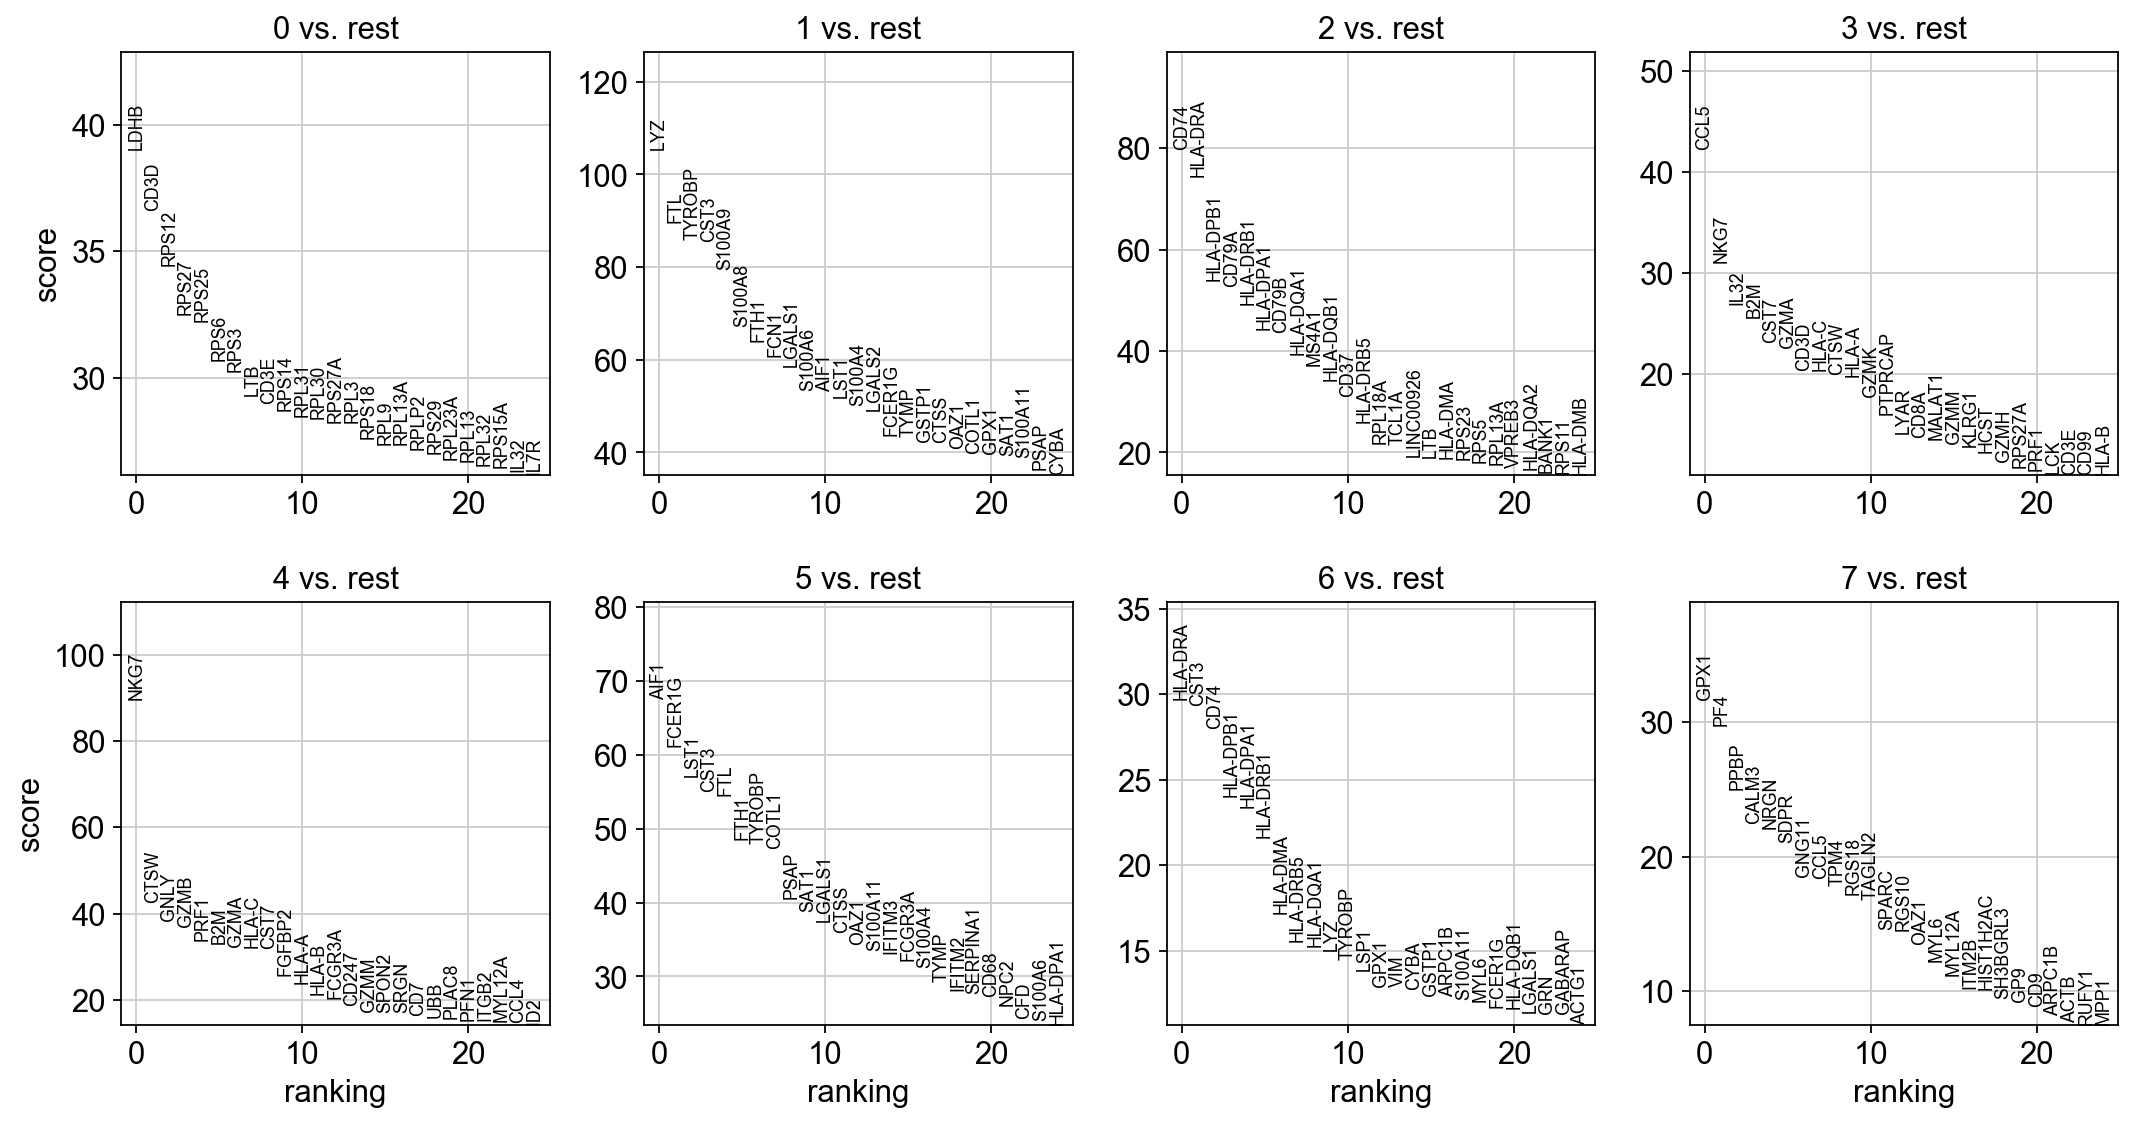

In [38]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [39]:
#show the top ranked genes per cluster 0,1,...,7 in a dataframe
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head()

,0,1,2,3,4,5,6,7
0,LDHB,LYZ,CD74,CCL5,NKG7,AIF1,HLA-DRA,GPX1
1,CD3D,FTL,HLA-DRA,NKG7,CTSW,FCER1G,CST3,PF4
2,RPS12,TYROBP,HLA-DPB1,IL32,GNLY,LST1,CD74,PPBP
3,RPS27,CST3,CD79A,B2M,GZMB,CST3,HLA-DPB1,CALM3
4,RPS25,S100A9,HLA-DRB1,CST7,PRF1,FTL,HLA-DPA1,NRGN


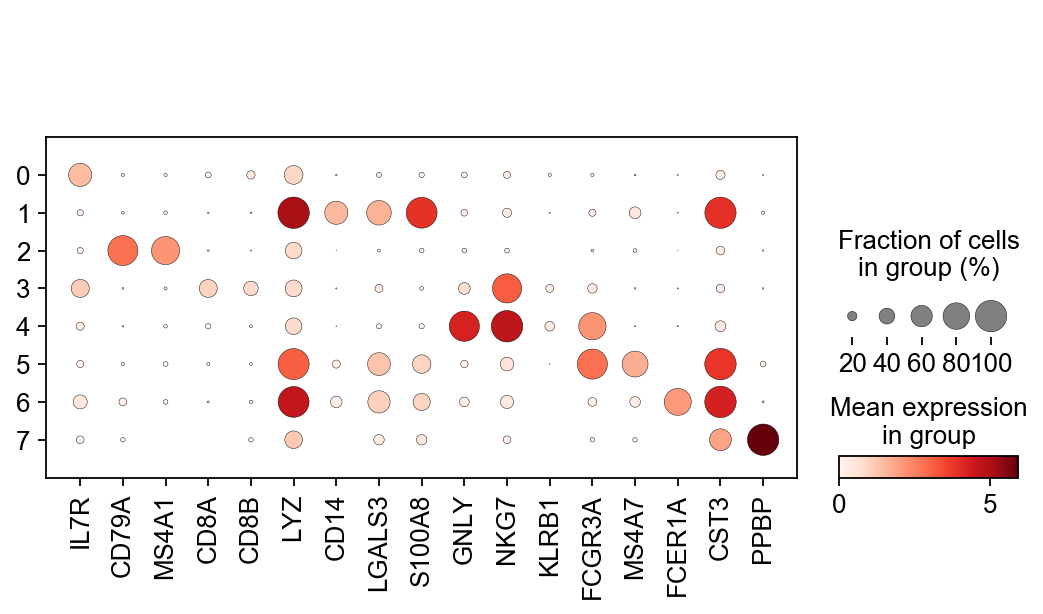

In [40]:
sc.pl.dotplot(adata,marker_genes,groupby='leiden')

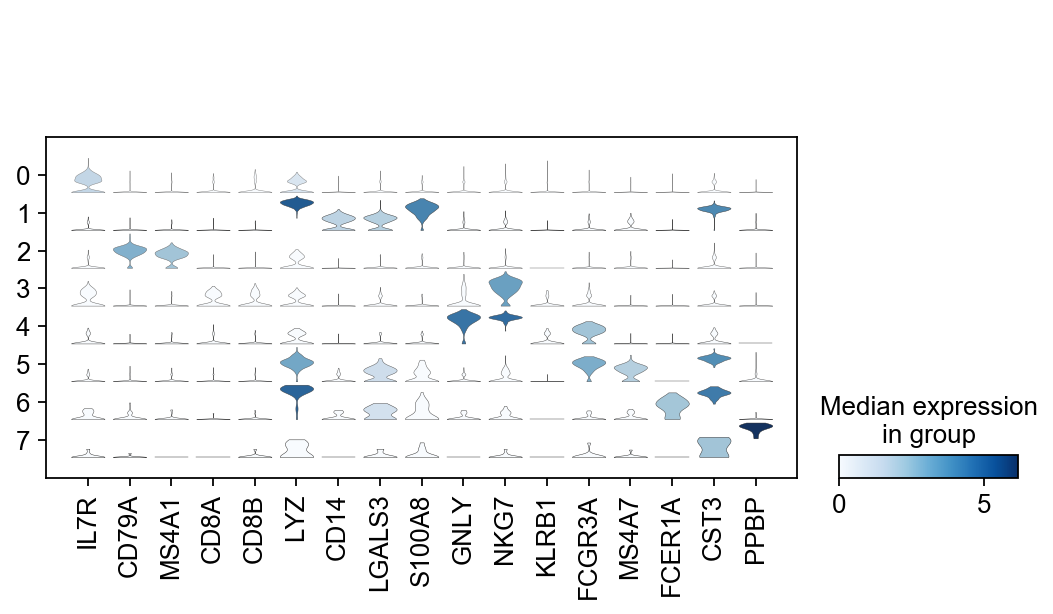

In [41]:
sc.pl.stacked_violin(adata,marker_genes,groupby='leiden',rotation=90)

In [42]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [43]:
adata.write(results_file,compression='gzip')

In [44]:
adata = sc.read(results_file)

In [63]:
adata.rename_categories('leiden',new_cluster_names)

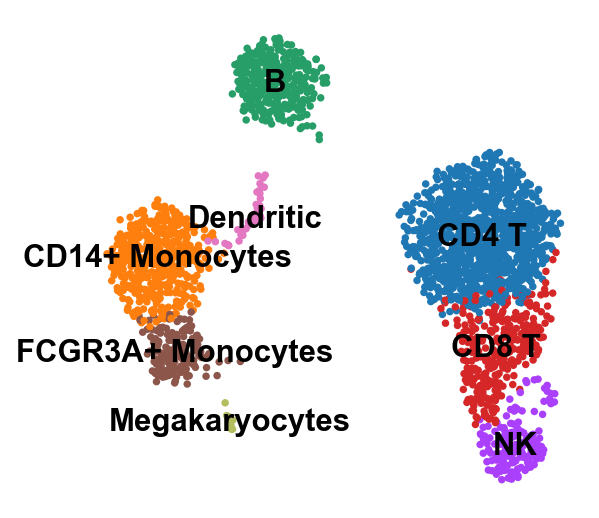

In [64]:
sc.pl.umap(adata,color='leiden',legend_loc='on data', title='',frameon=False,save='.pdf')